### Exploratory data analysis
Explore and visualize the created time-sequences

In [1]:
import pandas as pd
import os
import random 
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import numpy as np
np.random.seed(2)
from collections import Counter
import random
random.seed(2)
from datetime import datetime
from classification_utils import fill_NaN

In [ ]:
# SET DATA PATHS
events_path = 'labelled_data/event/'
non_ev_path = 'labelled_data/non-events/'
si_path = 'labelled_data/SI/'
ssc_path = 'labelled_data/SSC/'

#### Number of magnetometers & observations per Latitude

In [3]:
print('Number of unique stations:', len(Counter([file.split('_')[0] for file in os.listdir(events_path)]).keys()))
print('Number of events in our dataset (same event recorded multiple times by different stations):', sum(Counter([file.split('_')[0] for file in os.listdir(events_path)]).values()))

Number of unique stations: 97
Number of events in our dataset (same event recorded multiple times by different stations): 193


In [4]:
# how many times each station/latitude appear in the dataset --> some lat more present than other?
stations = pd.DataFrame({})
for file in os.listdir(events_path):
    stations = pd.concat([stations, pd.read_csv(events_path+file)[['IAGA', 'GEOLAT']]])

stations = stations.drop_duplicates(subset=['IAGA']).reset_index(drop=True)
stations.dropna(inplace=True)
stations.reset_index(drop=True, inplace=True)
stations

,IAGA,GEOLAT
0,PG2,-84.42
1,T38,61.00
2,GIM,56.38
3,IGC,69.30
4,SMI,60.02
...,...,...
92,CHD,70.62
93,FMC,56.66
94,FSJ,56.23
95,C06,53.35


In [5]:
stations.IAGA.nunique() # correct

97

In [6]:
cnt_time_stats_appear = Counter([file.split('_')[0] for file in os.listdir(events_path)]) # { station_name : num_time_station_in_dataset }
stations = stations[stations['IAGA'].isin(cnt_time_stats_appear.keys())]
stations.reset_index(drop=True, inplace=True)
stations['cnt_time_stats_appear'] = [cnt_time_stats_appear[stations.at[i, 'IAGA']] for i in range(len(stations))]

In [7]:
stations.cnt_time_stats_appear.sum() # correct

193

In [8]:
stations

,IAGA,GEOLAT,cnt_time_stats_appear
0,PG2,-84.42,3
1,T38,61.00,3
2,GIM,56.38,3
3,IGC,69.30,1
4,SMI,60.02,2
...,...,...,...
92,CHD,70.62,1
93,FMC,56.66,1
94,FSJ,56.23,1
95,C06,53.35,1


In [9]:
stations.GEOLAT.min(), stations.GEOLAT.max()

(-85.5, 70.62)

In [10]:
def stats_per_LAT_range(stats_LAT_df, k_degrees_per_range):
    '''Create a column with range of belonging of the GEOLAT (each interval of k_degrees_per_range degrees)'''

    latitude_ranges = range(-90, # int(stats_LAT_df.GEOLAT.min()) - k_degrees_per_range, # start
                            99, # int(stats_LAT_df.GEOLAT.max()) + k_degrees_per_range, # end
                            k_degrees_per_range) # step

    def map_latitude_to_range(latitude):
        for i, range_start in enumerate(latitude_ranges[:-1]):
            range_end = latitude_ranges[i + 1]
            if range_start <= latitude < range_end:
                return f'{range_start}/{range_end}'

    stats_LAT_df['LAT_range'] = stats_LAT_df['GEOLAT'].apply(map_latitude_to_range)
    return stats_LAT_df

stats_per_LAT_range(stations, k_degrees_per_range = 10)

,IAGA,GEOLAT,cnt_time_stats_appear,LAT_range
0,PG2,-84.42,3,-90/-80
1,T38,61.00,3,60/70
2,GIM,56.38,3,50/60
3,IGC,69.30,1,60/70
4,SMI,60.02,2,60/70
...,...,...,...,...
92,CHD,70.62,1,70/80
93,FMC,56.66,1,50/60
94,FSJ,56.23,1,50/60
95,C06,53.35,1,50/60


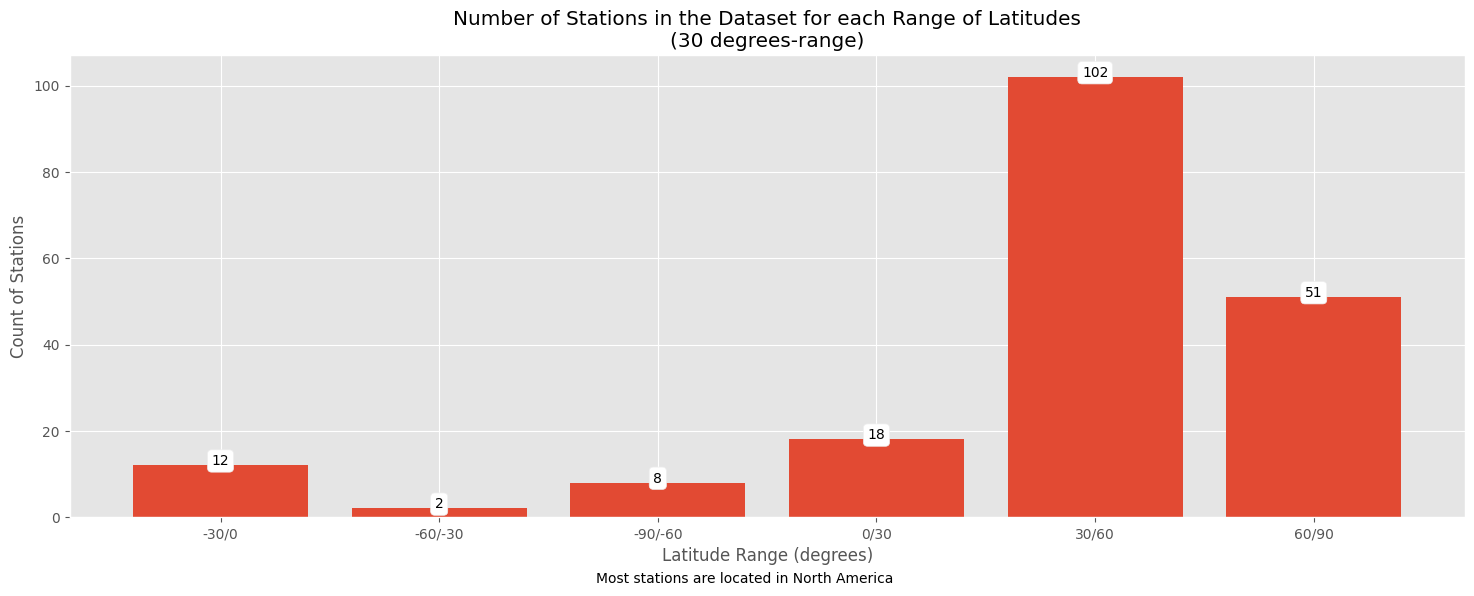

In [11]:
k = 30
deg_ranges_30 = stats_per_LAT_range(stations, k_degrees_per_range = k)
grp_mcolat_30 = deg_ranges_30.groupby(['LAT_range']).aggregate({'cnt_time_stats_appear':'sum'}).reset_index()

if grp_mcolat_30.cnt_time_stats_appear.sum() != len(os.listdir(events_path)):
    raise ValueError('Lost some observations! Total count of sequences in the dataset should be {}'.format(len(os.listdir(events_path))))


fig = plt.figure(figsize=(18,6))
plt.bar(grp_mcolat_30['LAT_range'], grp_mcolat_30['cnt_time_stats_appear'])

i=0
for p in grp_mcolat_30['cnt_time_stats_appear']:
    xx = i
    yy = p+1
    lab = round(p, 2)
    plt.annotate(lab, (xx, yy), 
                bbox=dict(boxstyle='round', fc='w'), 
                va='center', ha='center')
    i+=1

plt.xlabel('Latitude Range (degrees)')
plt.ylabel('Count of Stations')
plt.title('Number of Stations in the Dataset for each Range of Latitudes\n({} degrees-range)'.format(k))

fig.text(.5, .0001, 'Most stations are located in North America', ha='center')

plt.show()

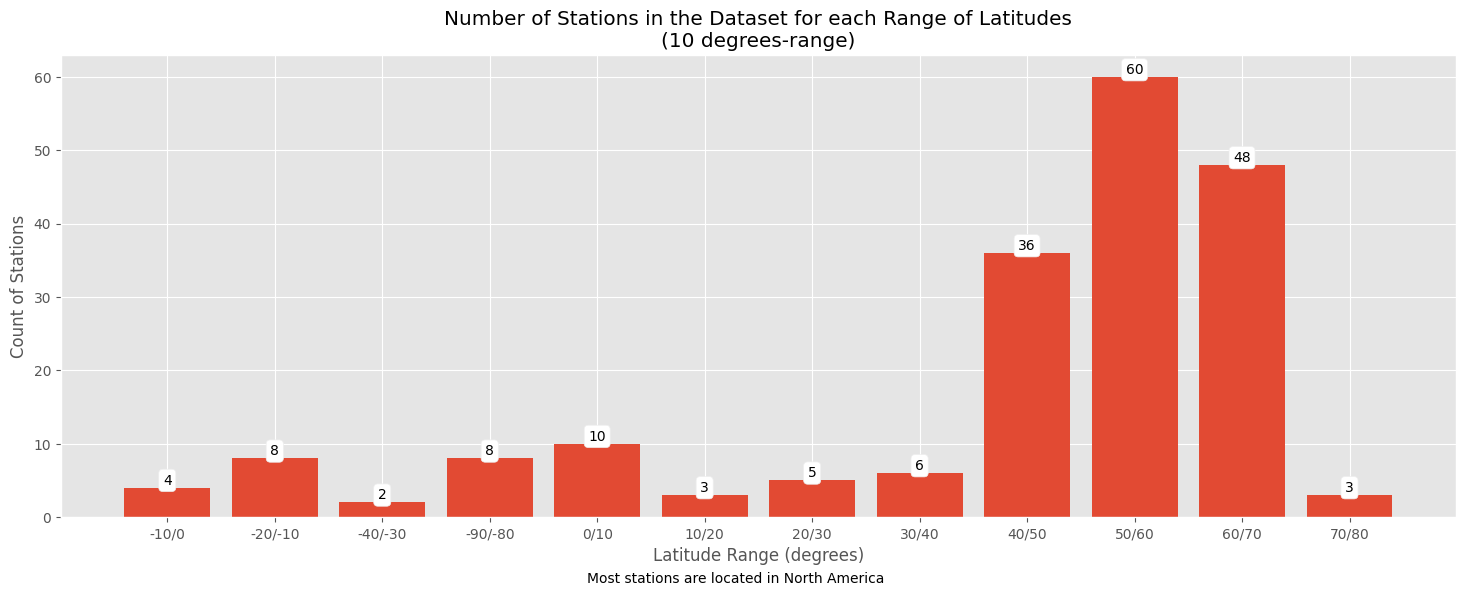

In [12]:
k = 10
ten_deg_ranges = stats_per_LAT_range(stations, k_degrees_per_range = k)
grp_mcolat_10 = ten_deg_ranges.groupby(['LAT_range']).aggregate({'cnt_time_stats_appear':'sum'}).reset_index()

if grp_mcolat_10.cnt_time_stats_appear.sum() != len(os.listdir(events_path)):
    raise ValueError('Lost some observations! Total count of sequences in the dataset should be {}'.format(len(os.listdir(events_path))))


fig = plt.figure(figsize=(18,6))
plt.bar(grp_mcolat_10['LAT_range'], grp_mcolat_10['cnt_time_stats_appear'])

i=0
for p in grp_mcolat_10['cnt_time_stats_appear']:
    xx = i
    yy = p+1
    lab = round(p, 2)
    plt.annotate(lab, (xx, yy), 
                bbox=dict(boxstyle='round', fc='w'), 
                va='center', ha='center')
    i+=1

plt.xlabel('Latitude Range (degrees)')
plt.ylabel('Count of Stations')
plt.title('Number of Stations in the Dataset for each Range of Latitudes\n({} degrees-range)'.format(k))

fig.text(.5, .0001, 'Most stations are located in North America', ha='center')

plt.show()

________

#### Number of unique events in our dataset
How many "different" events are present in the dataset? Meaning events with different timestamps (since the same event can appear more than once for different stations).

In [13]:
all_ts = set()
for file in os.listdir(events_path):
    gg, h = file.split('_')[1], file.split('_')[2].split('.')[0]
    ts = gg + ' ' + h
    all_ts.add(datetime.strptime(ts,'%Y-%m-%d %H:%M:%S'))

In [14]:
len(all_ts) # unique events in the dataset 

62

In [15]:
# all events recorded between 2012 and 2017
# (perhaphs some not picked bc not at MLT 11.30-12.30 or >30% NaN)
all_evs = pd.read_csv('data/sc_compact_1995_2019_d.csv')
all_evs = all_evs[(all_evs.year <= 2017)&(all_evs.year >=2012)].reset_index(drop=True)
all_evs['Date_UTC'] = pd.to_datetime(all_evs[['year', 'month', 'day']].astype(str).agg('-'.join, axis=1)+' '+all_evs[['hour', 'minute']].astype(str).agg(':'.join, axis=1), format='%Y-%m-%d %H:%M.%S')
len(all_evs.Date_UTC) # number of event timestamps

102

In [16]:
not_recorded_ts = set(all_evs.Date_UTC.to_list()) - all_ts
len(not_recorded_ts)

40

In [18]:
# not_recorded_ts # timestamp events not in our dataset

There is a total of 102 events between 2012 and 2017 in the events file, of which 62 are in our dataset (so 62 unique events - with different timestamps), and 40 did not make it into the dataset. This can be either because there were not data in the MLT = (11.30, 12.30) or because the percentage of missing values in the time series was higher than 30%. 

_________

#### Visualize events and non-event samples

In [21]:
len(os.listdir(events_path)), len(os.listdir(non_ev_path))

(193, 4595)

In [23]:
print('Using events-day data from 2012, 2013, and 2015,\nwe obtain', len(os.listdir(events_path)) ,'events and', len(os.listdir(non_ev_path)) , 'non-events: the two classes are significantly unbalanced!')

Using events-day data from 2012, 2013, and 2015,
we obtain 193 events and 4595 non-events: the two classes are significantly unbalanced!


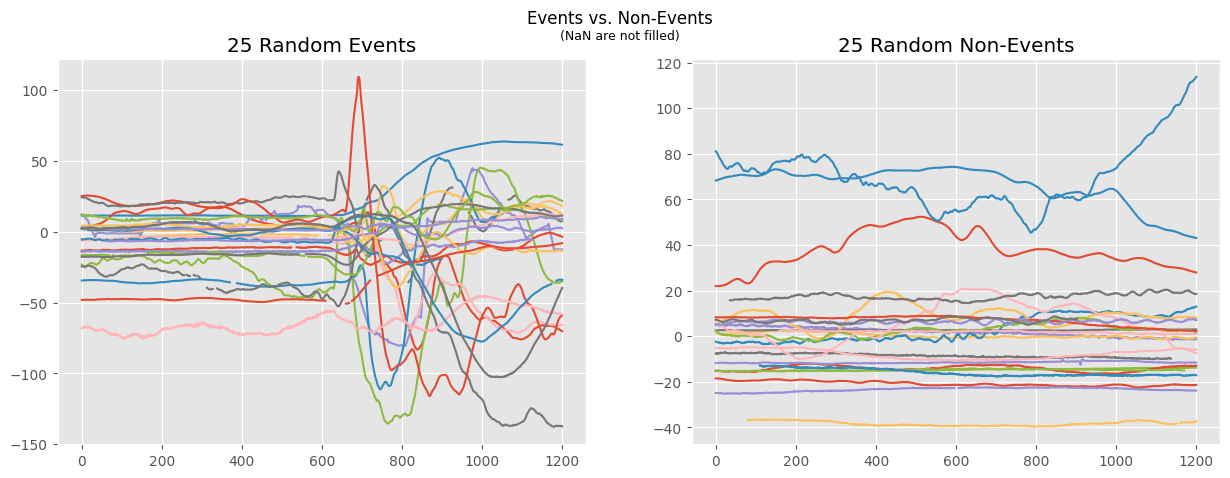

In [28]:
# PRINT RANDOM 25 RANDOM NON-EVENT AND 25 RANDOM EVENTS
# the different behaviour is visible: non-events are relatively stable around the mean value,
# while events display (approximately near the center of the timeseries, namely when the event happens)
# a significant oscillation change

non_events = os.listdir(non_ev_path)
events = os.listdir(events_path)
random.shuffle(non_events)
random.shuffle(events)
n = 25

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5)) 

for ev in events[:n]:
    event_df = pd.read_csv(events_path+ev)
    if 'Date_UTC' in event_df.columns:
        timestamp = 'Date_UTC'
    else:
        timestamp = 'Unnamed: 0'
    ax1.plot(event_df.sort_values(by=timestamp).dbn_nez)
ax1.set_title('25 Random Events')

for non_ev in non_events[:n]:
    non_ev_df = pd.read_csv(non_ev_path+non_ev)
    if 'Date_UTC' in non_ev_df.columns:
        timestamp = 'Date_UTC'
    else:
        timestamp = 'Unnamed: 0'
    ax2.plot(non_ev_df.sort_values(by=timestamp).dbn_nez)
ax2.set_title('25 Random Non-Events')

plt.suptitle('Events vs. Non-Events')

fig.text(0.5, 0.92, '(NaN are not filled)', ha='center', fontsize=9)

plt.show()

#### Visualize non-events, SI and SSC samples

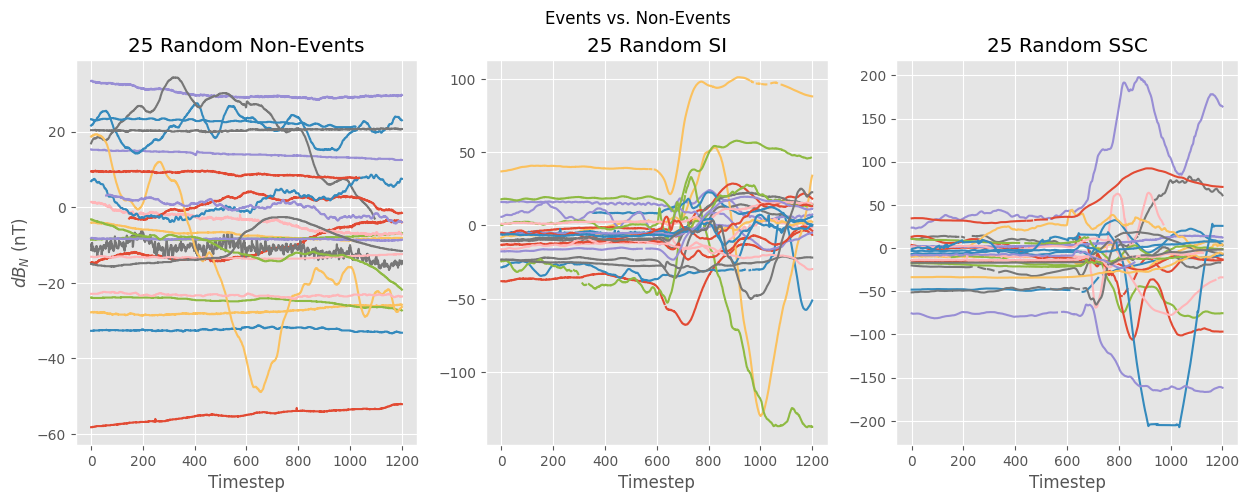

In [30]:
non_events = os.listdir(non_ev_path)
si = os.listdir(si_path)
storms = os.listdir(ssc_path)

random.shuffle(non_events)
random.shuffle(si)
random.shuffle(storms)
n = 25

fig, (ax2, ax1, ax0) = plt.subplots(1, 3, figsize=(15, 5)) 

for ev in storms[:n]:
    event_df = pd.read_csv(ssc_path+ev)
    if 'Date_UTC' in event_df.columns:
        timestamp = 'Date_UTC'
    else:
        timestamp = 'Unnamed: 0'
    ax0.plot(event_df.sort_values(by=timestamp).dbn_nez)
ax0.set_title('25 Random SSC')
ax0.set_xlabel('Timestep')

for ev in si[:n]:
    event_df = pd.read_csv(si_path+ev)
    if 'Date_UTC' in event_df.columns:
        timestamp = 'Date_UTC'
    else:
        timestamp = 'Unnamed: 0'
    ax1.plot(event_df.sort_values(by=timestamp).dbn_nez)
ax1.set_title('25 Random SI')
ax1.set_xlabel('Timestep')

for non_ev in non_events[:n]:
    non_ev_df = pd.read_csv(non_ev_path+non_ev)
    if 'Date_UTC' in non_ev_df.columns:
        timestamp = 'Date_UTC'
    else:
        timestamp = 'Unnamed: 0'
    ax2.plot(non_ev_df.sort_values(by=timestamp).dbn_nez)
ax2.set_title('25 Random Non-Events')
ax2.set_xlabel('Timestep')
ax2.set_ylabel(r'$dB_N$ (nT)')


plt.suptitle('Events vs. Non-Events')


plt.show()

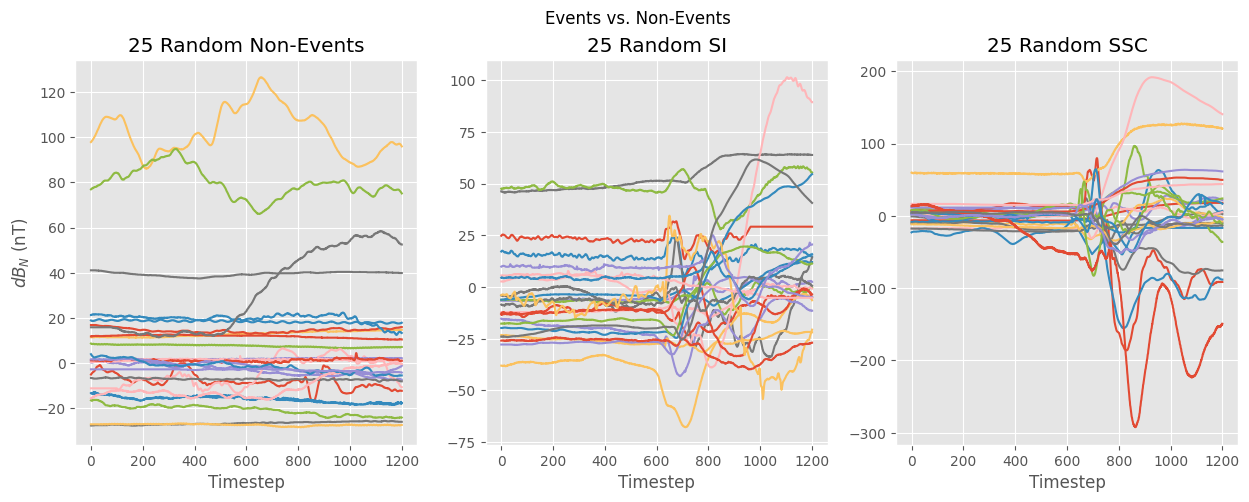

In [32]:
# FILL NaN VIA LINEAR INTERPOLATION
filling_method='linear_interpolation'

non_events = os.listdir(non_ev_path)
si = os.listdir(si_path)
storms = os.listdir(ssc_path)

random.shuffle(non_events)
random.shuffle(si)
random.shuffle(storms)
n = 25

fig, (ax2, ax1, ax0) = plt.subplots(1, 3, figsize=(15, 5)) 

for ev in storms[:n]:
    event_df = pd.read_csv(ssc_path+ev)
    if 'Date_UTC' in event_df.columns:
        timestamp = 'Date_UTC'
    else:
        timestamp = 'Unnamed: 0'
    ax0.plot(fill_NaN(event_df.sort_values(by=timestamp).dbn_nez, filling_method))
ax0.set_title('25 Random SSC')
ax0.set_xlabel('Timestep')

for ev in si[:n]:
    event_df = pd.read_csv(si_path+ev)
    if 'Date_UTC' in event_df.columns:
        timestamp = 'Date_UTC'
    else:
        timestamp = 'Unnamed: 0'
    ax1.plot(fill_NaN(event_df.sort_values(by=timestamp).dbn_nez, filling_method))
ax1.set_title('25 Random SI')
ax1.set_xlabel('Timestep')

for non_ev in non_events[:n]:
    non_ev_df = pd.read_csv(non_ev_path+non_ev)
    if 'Date_UTC' in non_ev_df.columns:
        timestamp = 'Date_UTC'
    else:
        timestamp = 'Unnamed: 0'
    ax2.plot(fill_NaN(non_ev_df.sort_values(by=timestamp).dbn_nez, filling_method))
ax2.set_title('25 Random Non-Events')
ax2.set_xlabel('Timestep')
ax2.set_ylabel(r'$dB_N$ (nT)')


plt.suptitle('Events vs. Non-Events')


plt.show()